# Practica 2

# Ejercicio 3

Resultado analítico: [148.4064211555775, -7.71499939185567e-21, 4.898587196589413e-16, -0.9]
Resultado diferenciacion: [148.4088946082942, -7.764982533998994e-21, 0.0, -0.9000333020001299]


,Res Analítico,Res Diferenciación,E. absoluto,E. relativo,E. porcentual
e^x,1.484064e+02,1.484089e+02,2.473453e-03,0.000017,0.001667
e^-2x^2,-7.714999e-21,-7.764983e-21,4.998314e-23,0.000000,0.000000
cosx,4.898587e-16,0.000000e+00,4.898587e-16,0.000000,0.000000
lnx,-9.000000e-01,-9.000333e-01,3.330200e-05,0.000000,0.000000


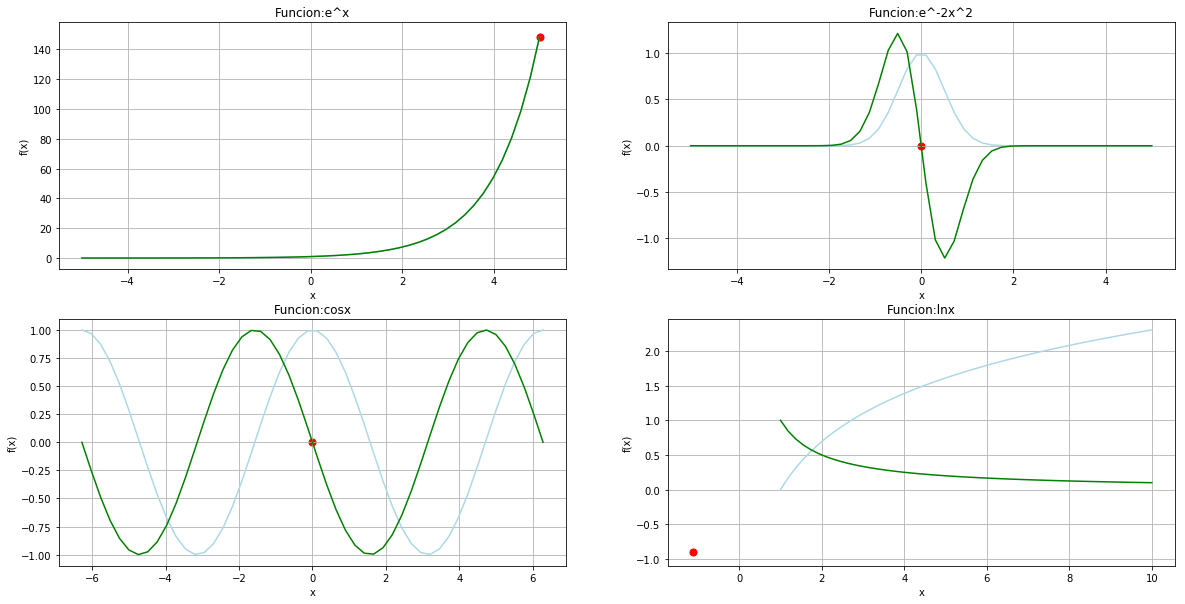

In [125]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

indiceReng = ['e^x','e^-2x^2','cosx','lnx']
indiceCol = ['Res Analítico','Res Diferenciación','E. absoluto','E. relativo','E. porcentual']
h = 0.01

indeter1 = []
indeter2 = []
indeter3 = []
indeter4 = []

#################################################################
######################### Funciones a evaluar ###################

# Funciones originales
def funcion1(x):
    return np.exp(x)
def funcion2(x):
    return np.exp(-2*((x)**2))
def funcion3(x):
    return math.cos(x)
def funcion4(x):
    return (math.log(x))

# Funciones que evalua con la formula de diferenciacion
def diferenciacion1(x):
    return (np.exp(x+h)-np.exp(x-h))/(2*h)
def diferenciacion2(x):
    return (np.exp(-2*((x+h)**2))-np.exp(-2*((x-h)**2)))/(2*h)
def diferenciacion3(x):
    return ((np.cos(x+h))-(np.cos(x-h)))/(2*h)
def diferenciacion4(x):
    return ((np.log(x+h))-(np.log(x-h)))/(2*h)

# Funciones que evalua las derivadas
def derivada1(x):
    return np.exp(x)
def derivada2(x):
    return -4*x*np.exp(-2*((x)**2))
def derivada3(x):
    return -math.sin(x)
def derivada4(x):
    return (1/(x))

# Funciones para calcular errores
def errorAbsoluto(vExacto,vCalculado):
    return abs(vExacto-vCalculado)
def errorRelativo(vExacto,vCalculado):
    if vExacto>0:
        return (abs(vExacto-vCalculado))/vExacto
    else:
        return 0
def errorPorcentual(vExacto,vCalculado):
    if vExacto>0:
        return (abs(vExacto-vCalculado))/vExacto*100
    else:
        return 0
    
#################################################################
################## Generacion de puntos para graficar ###########

x1 = np.linspace(-5,5, num=50)
x2 = np.linspace(-5,5, num=50)
x3 = np.linspace(-2*np.pi,2*np.pi, num=50)
x4 = np.linspace(1,10, num=50)

y1 =[]
y2 =[]
y3 =[]
y4 =[]

yDiferenciacion1 =[]
yDiferenciacion2 =[]
yDiferenciacion3 =[]
yDiferenciacion4 =[]

# Ciclo que genera valores de y para graficar
for i in range(50):
    y1+= [funcion1(x1[i]),]
    y2+= [funcion2(x2[i]),]
    y3+= [funcion3(x3[i]),]
    y4+= [funcion4(x4[i]),]
    
    yDiferenciacion1+= [diferenciacion1(x1[i]),]
    yDiferenciacion2+= [diferenciacion2(x2[i]),]
    yDiferenciacion3+= [diferenciacion3(x3[i]),]
    yDiferenciacion4+= [diferenciacion4(x4[i]),]
    
#################################################################
################## Cálculo de los resultados ####################
    
# Calcula los resultados analíticos
resAnalit1 = derivada1(5) - derivada1(-5) 
resAnalit2 = derivada2(5) - derivada2(-5) 
resAnalit3 = derivada3(2*np.pi) - derivada3(-2*np.pi) 
resAnalit4 = derivada4(10) - derivada4(1) 
resAnalit= [resAnalit1,resAnalit2,resAnalit3,resAnalit4]

# Calcula los resultados diferenciales
resDiferen1 = diferenciacion1(5) -diferenciacion1(-5) 
resDiferen2 = diferenciacion2(5) - diferenciacion2(-5) 
resDiferen3 = diferenciacion3(2*np.pi) - diferenciacion3(-2*np.pi) 
resDiferen4 = diferenciacion4(10) - diferenciacion4(1) 
resDiferen= [resDiferen1,resDiferen2,resDiferen3,resDiferen4]

print('Resultado analítico: ' + str(resAnalit))
print('Resultado diferenciacion: ' + str(resDiferen))

#################################################################
################ Ciclo que grafica las funciones ################

conjuntoX = [x1,x2,x3,x4]
conjuntoY = [y1,y2,y3,y4]
conjuntoYdifer = [yDiferenciacion1,yDiferenciacion2,yDiferenciacion3,yDiferenciacion4]

k= 0
fig, axs = plt.subplots(2,2,figsize=(20,10))

for i in range(2):
    for j in range(2):
        titulo = 'Funcion:' + indiceReng[k]
        axs[i,j].set(xlabel ='x',ylabel = 'f(x)',title = titulo)
        axs[i,j].grid()
        axs[i,j].plot(conjuntoX[k],conjuntoY[k],color = 'lightblue')
        axs[i,j].plot(conjuntoX[k],conjuntoYdifer[k],color = 'green')
        k+= 1
        
axs[0,0].scatter(5,resDiferen1,s=50,marker="o",c = 'red')
axs[0,1].scatter(0,resDiferen2,s=50,marker="o",c = 'red')
axs[1,0].scatter(0,resDiferen3,s=50,marker="o",c = 'red')
axs[1,1].scatter(-1.11,resDiferen4,s=50,marker="o",c = 'red')

#################################################################
################ Ciclo que calcula los errores ##################

eAbsoluto = []
eRelativo = []
ePorcentual = []

for i in range(4):
    eAbsoluto += [errorAbsoluto(resDiferen[i],resAnalit[i]),]
    eRelativo += [errorRelativo(resDiferen[i],resAnalit[i]),]
    ePorcentual += [errorPorcentual(resDiferen[i],resAnalit[i]),]
    
#################################################################
################ Parte 2: Impresion de la tabla #################

d = {indiceCol[0]: pd.Series(resAnalit, index = indiceReng),
    indiceCol[1]: pd.Series(resDiferen, index = indiceReng),
    indiceCol[2]: pd.Series(eAbsoluto, index = indiceReng),
    indiceCol[3]: pd.Series(eRelativo, index = indiceReng),
    indiceCol[4]: pd.Series(ePorcentual, index = indiceReng)
    }

pd.DataFrame(d, index=indiceReng, columns=indiceCol)
#################################################################

# fig.savefig("ejercicio3.png")
# plt.show()